In [1]:
from google.colab import drive
drive.mount('/content/drive') # for google colab. adjust accordingly

ModuleNotFoundError: No module named 'google.colab'

In [3]:
PARENT_DIR = '/content/drive/MyDrive/CS115_hw3/' # for google colab. adjust accordingly

In [ ]:
################################
#        RUN THIS CELL
################################
from IPython.core.display import HTML
HTML(f"{PARENT_DIR}style.css") # if running in colab
HTML("style.css") # if running locally


<div class='header_lightcyan'>

# <img style="float: left; padding-right: 10px; width: 60px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC295/CS287/E-115B: Deep Learning for NLP

<br/>
<hr color=black>

## Homework 3: The Power of Transformers
### THE CYAN BOOK

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructor**: Chris Tanner<br/>
**Release Date**: Oct 5 (Tues) @ 11:59pm<br/>
<font color="red">**Due Date**: Oct 19 (Tues) @ 11:59pm</font>

<hr color=black>
<center>
<div class='quote'>

_"That I would be good, even when I am overwhelmed."_

    Alanis Morissette (September 18, 1999)
</div>
</center>
</div>

<div class='header_lightcyan'>
    
# OVERVIEW

</div>
<br/>
This assignment spans the content covered in the following lectures:

- **Lecture 9:** Self-Attention
- **Lecture 10:** Transformers
- **Lecture 11:** BERT
- **Lecture 12:** GPT-2

Early in this course, we highlighted that the two cornerstones for all of NLP are: (1) _representing_ language; and (2) using those representations to _model_ a particular task. Starting with RNNs/LSTMs, we saw that one could simultaneously do both. That is, we could perform certain sequential tasks (e.g., 1-to-1 mapping like part-of-speech tagging, N-to-M mappings like machine translation, and many-to-1 mappings like sentiment analysis), and en route learn great contextualized representations, which were captured via the hidden layers. However, it is Transformers that offer the clearest picture of how well one can jointly learn representations and perform well on a task.

If this course didn't have a significant research project, we would guide you in this assignment to write a Transformer from scratch, while implementing Self-Attention manually. Instead, this assignment provides you with practice using Transformers in the most common way that they're used today -- leveraging the power of large, pre-trained Transformers for a particular, down-stream task that you're interested in (i.e., "fine-tuning"). As promised, the latter half of the homework assignments will be shorter than the first half, as we hope this affords you tons of time to spend on your research projects.

<div class='header_lightcyan'>
    
# LEARNING OBJECTIVES

</div>
<br/>

The purpose of this homework is to help you:

- gain practical experience using Transformers for fine-tuning
- understand the theoretical concepts that concern Self-Attention and Transformers
- strengthen your understanding of classification and contextualized representations

To assist you reach these learning objectives, this homework is structured into three parts:
- <span style="background-color: #FDFFB6"><b>Foundation (concepts):</b></span> demonstrate an understanding of the core concepts taught in lectures
- <span style="background-color: #FFC8C8"><b>Application (programming):</b></span> gain experience putting that knowledge into practice 
- <span style="background-color: #CAFFBF"><b>Research (creating new knowledge):</b></span> use your current NLP knowledge and skills to go beyond the course material, to grasp cutting-edge results and to critically accept or challenge that information. This serves as practice for you to research your own NLP interests and to be well-equipped to continuously learn the latest, greatest NLP work.

<div class='header_lightcyan'>
    
## SUPPORT

</div>

- **Supplemental Resources:** See the list of [supplemental resources](https://harvard-iacs.github.io/CS287/supplemental) for a wealth of rich information concerning Machine Learning, NLP, and Math. Some of the courses listed concern the exact topics covered in this homework and lectures.
- **Sanity Check cells:** We provide several 'sanity check' cells which allow you to see our expected outputs. You should ensure your code produces the same. <span style="background-color: #FDFFB6"><b>**NOTE:** We are not claiming that passing the sanity check cells indicates that you have _fully_ implemented everything correctly; rather, they provide simple checks to help inform you if you are on the right track.</span>
- **Ed**: If you are stuck on anything conceptual (not code) about the content from lectures, please post a question on Ed. This is your community, and please contribute and help each other out. If your questions concern the homework, you can post these on Ed, too, but make sure you are not posting any of your code or solutions in general. If you think you've spotted a bug in our homework questions, or something that needs clarifying, please let us know on Ed! We want to correct these issues ASAP.
- **OH:** After having given a wholehearted attempt, if you are having trouble with the homework, please come to Office Hours.
- **Classmates:** We have a strict policy about the homeworks being individual. You are free to discuss _concepts_ with one another, to help each other learn the material. However, no student shall ever discuss their solutions or see another student's solutions to any problem. Once you see someone's coding solution, it's nearly impossible to harness that information in a way that you can write your own unique solution. You've been robbed of a learning opportunity and will likely just regurgitate someone else's work. As a reminder, if you want to take a shortcut on any problem by looking online for already-existing solutions, that's permissible, but you must cite your sources. Otherwise, it constitutes cheating. Posting any pieces of this homework online for others to see if a flagrant violation of our academic policy.
- **Other:** I want everyone to be and feel fully supported. If there's anything else we, as a teaching staff, can do to further assist in your learning, please let us know. Related, at the end of this homework assignment, you are expected to complete an anonymous feedback form. I urge you to critically and earnestly think about your own learning, communicate to us your thoughts, and to optionally tell us possible adjustments we could make so that you meet our learning expectations and you achieve your own learning goals.

<div class='header_yellow'>
    
# 1. FOUNDATION (CONCEPTS) [10 points]

</div>
<br/>

<div class='q_yellow'><b>1.1 Transformer Encoder vs FFNN [2 points]</b>

In Lecture 10, we discussed the canonical Transformer Encoder + Transformer Decoder architecture, for the task of Machine Translation. The Transformer Encoder allowed an input sequence to be fed into the model all at once, and all processing was propogated "upward" through the network. If we were to replace the Transformer Encoder with a simple Feed-Forward Neural Network with nothing extra, but left the Transformer Decoder in tact, as is, (we are still doing Machine Translation):
- How do you think this would affect performance? (1-2 sentences)
- What contributes most to this performance difference? (~2 sentences)
</div>


YOUR RESPONSE HERE
- I think we woud be affecting performance negatively bc
- Part of this performance is affected by 

No attention mechanism, no positionality


<div class='q_yellow'><b>1.2 Positional Embeddings [4 points]</b>

In Lecture 10, we learned that Transformer Encoders and Transformer Decoders include positional encodings.

**PART 1 (2 points):**
If our positional encoding is based on `sin()` and `cos()`, like in [the original paper](https://arxiv.org/pdf/1706.03762.pdf), and thus is reasonable and effective, how important is it to reset the index to the positional encoding for each input sequence (e.g., sentence), so that the first input of each sequence is effectively starting fresh at the first "index/position"? (Please explain in 2-3 sentences.)

**PART 2 (2 points):**
Imagine that we replaced the positional encoding and made it based entirely on the exact index of the input (e.g., use some reasonable vector representation that is essentially captures $f(x) = x$). How important is it to reset the index of positional encoding for each input sequence (e.g., sentence), so that each input sequence is effectively starting fresh at the first "index/position"? Do we need to ever reset the position to "0" or can we let it grow forever? (Please explain in ~3 sentences.)

</div>


YOUR RESPONSE HERE

Notes: OH Annie suggests part 1: sin or cos are bounded, how important is it to start with sin(0), cos(0)

part 2: Position encoding is just 0,1,2,3,4, etc. how important is it to start over all the time. is it a good idea to let this good grow? Not good because magnitudes get too large. 

what is the point of positional encoding? Get representation position of each word in the sentence


<div class='q_yellow'><b>1.3 Self-Attention Scores  [2 points]</b>

Using only matrix multiplications, create a self-attention scoring function $a(i,j$) for queries and keys that have different vector lengths? To be clear, this scoring function only needs to output a raw score for every other token in the input sequence (a normalized softmax will be applied afterwards).

Let:
- $i$ and $j$ represent token indices
- $Q_i$ represent the query vector for word $i$
- $K_i$ represent the key vector for word $i$

You are allowed to introduce new weight matrices.

Below, complete the equation and/or explain your self-attention function.

$a(i,j) = ?$
</div>


YOUR RESPONSE HERE

<div class='q_yellow'><b>1.4. Attention [2 points]</b>

Assume that our query vectors and key vectors are always of the same length. Let's say have 3 different attention scoring functions:
- (a) vector addition
- (b) vector subtraction
- (c) dot product

Rank these scoring functions in terms of how effective you think each one will be. Please explain in 3-4 sentences.
</div>


YOUR RESPONSE HERE
I think the most effective will be c) dot product, the next most effective would be a) vector addition and finally b) vector substraction


<div class='header_lightpurp'>
    
# 2. APPLICATION (PROGRAMMING) [70 points]

</div>


# Fine-Tuning Large Language Models for Transfer Learning

Welcome to the programming part of Homework #3!  This homework is particularly exciting, because it covers *large language model (LLM) fine-tuning*, which is evolving into one of the dominant paradigms for state-of-the-art supervised learning in NLP.

In this homework, you will apply LLM fine-tuning to classifying tweets from celebrities, a task that we made from scratch.  Keep in mind that this assignment only gives you a taste of what LLM fine-tuning is capable of.  Since it was introduced, methods based on LLM fine-tuning have overtaken the top of many leaderboards (e.g. sentiment classification, text entailment, question-answering, etc.) and even led to super-human performance on several tasks.

The basic component of LLM fine-tuning is the large language model.  You have already seen several instances of language models (e.g. CBOW in HW #1 is a very basic version, the machine translation decoder in HW #2 is a *conditional* variant).  However, these examples are typically not very deep (i.e. only a few layers).  In the late 2010s, the NLP community discovered that training a deep (a.k.a. large) language model and then fine-tuning it on some downstream task (e.g. text classification) leads to very good results.  Today, one of the most popular LLMs is called BERT (see [the original paper](https://arxiv.org/pdf/1810.04805.pdf) and [this excellent blogpost](https://jalammar.github.io/illustrated-bert/) to read more).  

Unlike previous models we've implemented thus far, BERT is massive.  It is comprised of 12 self-attention and feed-forward layers, with a whopping 100 million parameters.  This is precisely the reason why we are distributing this homework through Google Colab.  Even fine-tuning BERT on a small-ish dataset would take several hours on a CPU.  Thus, we will take advantage of Colab's ability to hook us up to GPUs to accelerate computing, while also teaching you how to use PyTorch with GPUs in the process (don't worry -- it's super easy).

Before we start, here are all the packages that you will need today, as well as a helper function that loads from and writes to [pickle](https://docs.python.org/3/library/pickle.html) files. 

We have also imported the tqdm package for you. This is a function that allows you to visualize the expected completion time of your for loops. To use this, simply type

```
for i in tqdm(range(100)):
    print(i)
```

Check out its [documentation](https://tqdm.github.io/) for more information!

In [1]:
import pickle
import re
from typing import List, Tuple, Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn, optim, Tensor
from torch.nn import CrossEntropyLoss
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence
from torch.utils.data import DataLoader, Dataset

from tqdm.notebook import tqdm

In [2]:
def load_pickle(path):
    try:
        with open(path,'rb') as f:
            return pickle.load(f)
    except:
        print(f'Load pickle error on {f}')

def write_pickle(path, d):
    try:
        with open(path,'wb') as f:
            return pickle.dump(d, f, protocol = pickle.HIGHEST_PROTOCOL)
    except:
        print(f'Write pickle error on {f}')

First, let's install the [`transformers` library](https://huggingface.co/transformers/).  This library is built by a company called HuggingFace that specializes in creating open-source NLP tools.  In `transformers`, you will find a repository of pre-trained LLMs, including BERT.  Run the following cell.  

In [3]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 6.8 MB/s eta 0:00:01     |█████████████▉                  | 1.2 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 950 kB/s  eta 0:00:01
     |████████████████████████████████| 895 kB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 30.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.


Next, let's make sure this notebook is hooked up to a GPU.  The following cell should output some metrics if that's the case.  If not, go to Runtime -> Change runtime type -> change the "Hardware Accelerator" to a GPU and click "Save".  Then, run the following cell and it should return something.  

You can find the GPU type halfway through the output.  Most people will be allocated a `Tesla K80`, although if you're lucky, you might get something more powerful.  

In [4]:
!kill -9 21717

/bin/sh: line 0: kill: (21717) - No such process


In [5]:
!nvidia-smi

Mon Oct 18 17:14:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.142.00   Driver Version: 450.142.00   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:1E.0 Off |                    0 |
| N/A   43C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Data Preparation

Run the following cell to load in the data (stored as a csv file).  Explore the `DataFrame` a bit to gain some intuition about what you're working with.  

For context, we have collected 9000 tweets from 20 celebrity users (450 tweets each). Your task will be to build a NLP model that predicts who wrote each tweet based on its textual content. 

In [6]:
!ls

celeb_tweets.csv	 __MACOSX      word2vec_contraction.pk
CS287_HW3_student.ipynb  model-w2v.pk  word2vec_vector.pk
CS287_HW3.zip		 style.css     word2vec_vocab.pk


In [7]:
#df = pd.read_csv(f'{PARENT_DIR}celeb_tweets.csv').set_index('id')
df = pd.read_csv(f'celeb_tweets.csv').set_index('id')
df.head()

,text,user,created,display_text_start,display_text_end
id,,,,,
1441831524312109058,My new cereal is helping kids play sports with...,shaq,2021-09-25 18:26:37+00:00,0,192
1441506797773262849,It’s not just a car wash – it’s @MisterCarWash...,shaq,2021-09-24 20:56:17+00:00,0,225
1441495142486138882,Join me and the The Shaquille O’Neal Foundatio...,shaq,2021-09-24 20:09:58+00:00,0,263
1440718747275202566,Catch me on the @kellyclarksontv LA premiere w...,shaq,2021-09-22 16:44:51+00:00,0,56
1438667656555601923,Did you know you could donate $10 to charity b...,shaq,2021-09-17 00:54:33+00:00,0,118


.One tricky feature of tweets is that they often include username mentions (starting with @) and urls.  Pretrained LLMs (such as BERT) are typically not exposed to these Twitter-specific features, so our first pre-processing step will be to replace all usernames with a custom `USER_TOKEN` and all urls with a custom `URL_TOKEN`.

Run the cell below to accomplish this step.  The preprocesed text will be stored in a variable called `filtered_text`, which you will work with in the remainder of this assignment.

In [8]:
# The following code is adapted from https://github.com/digitalepidemiologylab/covid-twitter-bert/blob/c87912b409659f40018e839c4124be5ae2486713/utils/preprocess.py.

USER_TOKEN = '[USER]'
URL_TOKEN = '[URL]'

def replace_usernames(text, filler=USER_TOKEN, regex=re.compile(r'(^|[^@\w])@(\w{1,15})\b')):
    # replace user handles by filler
    text = re.sub(regex, filler, text)
    # add spaces between, and remove double spaces again
    text = text.replace(filler, f' {filler} ')
    text = ' '.join(text.split())
    return text

def replace_urls(text, filler=URL_TOKEN, regex=re.compile(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))')):
    # replace urls by filler
    text = re.sub(regex, filler, text)
    # add spaces between, and remove double spaces again
    text = text.replace(filler, f' {filler} ')
    text = ' '.join(text.split())
    return text
  
filtered_text = df['text'].map(replace_usernames).map(replace_urls)

In [9]:
def run_doc2vec(text: List[str], w2v: Dict[str, np.ndarray]) -> np.ndarray:
    return np.mean([w2v[word] for word in doc if word in w2v], axis=0)


We will be using `filtered_text` to predict `df["user"]`.  Let's start by doing a train-test split.  We will use 60\% for training and 40\% for testing.  Run the following cell. Note that we are stratifying the split, such that we have exactly the same number of tweets from each user in the training set and the testing set. 

In [10]:
from sklearn.model_selection import train_test_split

train_text, test_text, train_user, test_user = train_test_split(
    filtered_text.tolist(), df["user"].tolist(), train_size=0.6, test_size=0.4, 
    stratify=df["user"].tolist(), random_state=8888
)
print(f'Training Size: {len(train_text)}')
print(f'Testing Size: {len(test_text)}')

Training Size: 5400
Testing Size: 3600


<div class='header_lightpurp'>

## Baseline model: Word2Vec

</div>

As with all machine learning/data science/NLP projects, it is always good practice to start small and simple.
Before we dive into a complex BERT model, we would like to checkout some baseline models to evaluate how hard the task is. Our first baseline model is doc2vec from section 2.5 in HW1. We can assign a vector to every tweet using pretrained Word2Vec word vectors of every word in the tweet. If a word in the corpus happens to be missing from the pretrained vocabulary, we skip it when computing document vectors, and the denominator in the average is adjusted accordingly.



### Word2Vec Tokenization

We start by preparing a tokenizer specific to Word2Vec. **Note:** This section has already been implemented for you. Your job is to read the code and make sure you understand what's happening.

In [11]:
#w2v_id_to_vocab = load_pickle(f"{PARENT_DIR}word2vec_vocab.pk")
#w2v_id_to_vector = load_pickle(f"{PARENT_DIR}word2vec_vector.pk")
#contractions = load_pickle(f"{PARENT_DIR}word2vec_contraction.pk")

# Local computer

w2v_id_to_vocab = load_pickle(f"word2vec_vocab.pk")
w2v_id_to_vector = load_pickle(f"word2vec_vector.pk")
contractions = load_pickle(f"word2vec_contraction.pk")
w2v_vocab_to_id = {v:i for i,v in enumerate(w2v_id_to_vocab)}

In [12]:
def w2v_tokenizer(text):
  t = text.replace(USER_TOKEN, "") # get rid of USER_TOKEN since it doesn't have word2vec embedding
  t = t.replace(URL_TOKEN, "")    # also get rid of URL_TOKEN since it doesn't have word2vec embedding
  for k,v in contractions.items():
    t = t.replace(k, v) # replace some contractions that do not have word2vec embedding as separate terms
  return t.lower().translate(str.maketrans("", "", '!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“”‘’…')).split()

### Word2Vec Dataset and DataLoader

Next, we implemented a custom PyTorch `Dataset` for our data, called `W2VTweetsDataset`. As always, we need to implement three functions: `__init__`, `__len__`, and `__getitem__`. The `__getitem__` function should return two tensors -- a tensor of tokenized ids and a tensor with a single integer representing the user (Note: we make use of the `USER_MAPPING` dictionary below).

In [13]:
USER_MAPPING = {
    'arianagrande': 0,
    'chrissyteigen': 1,
    'conanobrien': 2,
    'cristiano': 3,
    'iamsteveharvey': 4,
    'jlo': 5,
    'kingjames': 6,
    'ladygaga': 7,
    'mindykaling': 8,
    'naomiosaka': 9,
    'oprah': 10,
    'rihanna': 11,
    'selenagomez': 12,
    'shaq': 13,
    'simone_biles': 14,
    'taylorswift13': 15,
    'therock': 16,
    'trevornoah': 17,
    'vancityreynolds': 18,
    'willsmith': 19
}

ID_MAPPING = {}
for k,v in USER_MAPPING.items():
  ID_MAPPING[v] = k

In [14]:
SKIP_IDX = -1

class W2VTweetsDataset(Dataset):
    
    def __init__(self, text: List[str], labels: List[str], skip_idx: int):
        self.tokenized_text = [w2v_tokenizer(t) for t in text]
        self.tokenized_id = [[w2v_vocab_to_id[token] if token in w2v_vocab_to_id else skip_idx for token in t] for t in self.tokenized_text]
        self.labels = labels
    
    def __len__(self) -> int:
        return len(self.labels)
    
    def __getitem__(self, idx: int) -> Tuple[torch.tensor, torch.tensor]:
        return torch.tensor(self.tokenized_id[idx]), torch.tensor(USER_MAPPING[self.labels[idx]])

Now, run the following cell to create two datasets -- one for training and one for testing.

In [15]:
w2v_train_ds = W2VTweetsDataset(train_text, train_user, SKIP_IDX)
w2v_test_ds = W2VTweetsDataset(test_text, test_user, SKIP_IDX)

Check that your dataset works by running the cell below.

In [16]:
print(len(w2v_train_ds))
print(len(w2v_test_ds))
print(w2v_train_ds[0])
print(w2v_test_ds[0])
print(w2v_train_ds[-1])
print(w2v_test_ds[-1])

5400
3600
(tensor([ 2164,    -1,  1928,  4429,  8052,  4175,  3212, 10677,  6013,   648,
         4744,    -1,    -1,  1375,    -1,  9782,    -1,  9044,    68,  1206,
         1342,   491,  7476,  8826,    -1,    -1]), tensor(14))
(tensor([  648,  9559,    -1, 10854,  7183,  7588,   648,    -1, 10718,  2833,
         5385,  6051,  7476,  7716]), tensor(4))
(tensor([ 9559,   568,  6719, 10621, 11506,    -1,  2067,    -1,  9162,  8889,
         3371, 10907,  1979,  2968,  3282,  5006]), tensor(2))
(tensor([ 6010,  9777,  3106,  3658,  8765,  8880, 10655,   648,  2276,   748,
         4398,   653,   448,  6900,   748,   892]), tensor(0))


Next, we create two dataloaders -- `w2v_train_dl` and `w2v_test_dl`.  We use a batch size of 64 and ensured that we correctly set the standard parameters that need to be provided to dataloaders (e.g. `shuffle`, `drop_last`, `collate_fn`). Let `SKIP_IDX` be the padding index as well, since we are also going to skip over the W2V embedding of the pad tokens.

In [17]:
def w2v_pad_collate_classifier(batch):
    (xx, yy) = zip(*batch)
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=SKIP_IDX)
    yy_stack = torch.stack(yy, dim=0)
    return xx_pad, yy_stack

w2v_train_dl = DataLoader(w2v_train_ds, batch_size=64, shuffle=True, drop_last=True, collate_fn=w2v_pad_collate_classifier) 
w2v_test_dl = DataLoader(w2v_test_ds, batch_size=64, shuffle=False, drop_last=False, collate_fn=w2v_pad_collate_classifier) 

Run the following cell to get a sample batch from `w2v_train_dl`, showing that your dataloader works as expected.

In [18]:
next(iter(w2v_train_dl))

(tensor([[ 1544,  3658,  7617,  ...,    -1,    -1,    -1],
         [ 6412,  4745,  3658,  ...,    -1,    -1,    -1],
         [  648,  9559,   748,  ...,    -1,    -1,    -1],
         ...,
         [ 2799,  1805,    -1,  ...,    -1,  5759,    -1],
         [ 3668, 10043,   900,  ...,    -1,    -1,    -1],
         [   68,  8970,  3668,  ...,    -1,    -1,    -1]]),
 tensor([12, 18,  1,  6,  3, 19, 12, 16, 10,  9,  2, 18,  2, 15, 10, 14,  4, 18,
          1,  7, 13, 11,  0,  6,  3,  5, 10, 15, 17,  7, 16, 18, 15,  7,  7, 15,
          9,  8,  5, 19, 15,  1, 11, 14,  1,  7, 12,  2,  0,  2,  4,  9, 13,  5,
          0, 10, 13,  2, 18,  2,  1, 14,  8, 14]))

### Word2Vec Model

We are now ready to build a Word2Vec model! In the two cells below, we've implemented a W2V classifier.

In [19]:
class W2VClassifier(torch.nn.Module):
    
    def __init__(self, word2vec: np.ndarray, hidden_size: int, output_size: int, skip_idx: int):
        super().__init__()
        
        self.skip_idx = skip_idx
        self.word2vec = word2vec
        self.hidden_size = hidden_size
        self.linear = torch.nn.Linear(hidden_size, output_size)
    
    def forward(self, input_seqs: Tensor) -> Tensor:

        empty_seq = torch.full(input_seqs[0].shape, self.skip_idx)
        doc_vecs = torch.tensor([np.mean([self.word2vec[id] for id in input_seq.long() if id != self.skip_idx], axis=0)
        if not torch.equal(input_seq.long(), empty_seq) else np.zeros(self.hidden_size) for input_seq in input_seqs]).float()

        return self.linear(doc_vecs).float()

### Word2Vec Training

Last, we've written a training/evaluation loop below to train/evaluate our model. A few important notes:
- We print the training/testing loss/accuracy every epoch.
- We make a graph of each metric over time once training is completed. 
- On our local machine, the training loop runs quite fast (~4s/epoch), and we are able to achieve >25% accuracy in under 10 epochs.

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 1/10 Train Loss: 0.04629494808338307
Epoch 1/10 Train Accuracy: 0.09685185185185186


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 1/10 Test Loss: 0.04671260933081309
Epoch 1/10 Test Accuracy: 0.16555555555555557


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 2/10 Train Loss: 0.045565506396470244
Epoch 2/10 Train Accuracy: 0.19


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 2/10 Test Loss: 0.046101517544852366
Epoch 2/10 Test Accuracy: 0.21305555555555555


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 3/10 Train Loss: 0.04495458607320432
Epoch 3/10 Train Accuracy: 0.2235185185185185


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 3/10 Test Loss: 0.0455986840195126
Epoch 3/10 Test Accuracy: 0.22305555555555556


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 4/10 Train Loss: 0.04443397270308601
Epoch 4/10 Train Accuracy: 0.2525925925925926


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 4/10 Test Loss: 0.04517471214135488
Epoch 4/10 Test Accuracy: 0.2477777777777778


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 5/10 Train Loss: 0.04399774259991116
Epoch 5/10 Train Accuracy: 0.27240740740740743


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 5/10 Test Loss: 0.04481076604790158
Epoch 5/10 Test Accuracy: 0.2544444444444444


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 6/10 Train Loss: 0.04360761081730878
Epoch 6/10 Train Accuracy: 0.2737037037037037


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 6/10 Test Loss: 0.04449202981260088
Epoch 6/10 Test Accuracy: 0.26


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 7/10 Train Loss: 0.04325257738431295
Epoch 7/10 Train Accuracy: 0.2762962962962963


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 7/10 Test Loss: 0.04420991433991326
Epoch 7/10 Test Accuracy: 0.2638888888888889


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 8/10 Train Loss: 0.04297280708948771
Epoch 8/10 Train Accuracy: 0.2922222222222222


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 8/10 Test Loss: 0.04396465480327606
Epoch 8/10 Test Accuracy: 0.25805555555555554


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 9/10 Train Loss: 0.042692017555236814
Epoch 9/10 Train Accuracy: 0.28425925925925927


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 9/10 Test Loss: 0.043742361995908946
Epoch 9/10 Test Accuracy: 0.27166666666666667


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 10/10 Train Loss: 0.042436899785642274
Epoch 10/10 Train Accuracy: 0.29574074074074075


  0%|          | 0/57 [00:00<?, ?it/s]

Epoch 10/10 Test Loss: 0.043540837897194755
Epoch 10/10 Test Accuracy: 0.2772222222222222


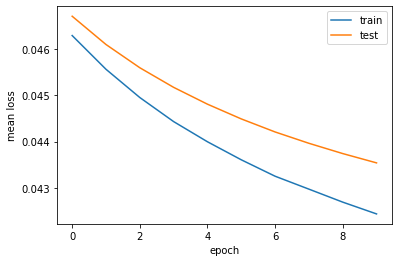

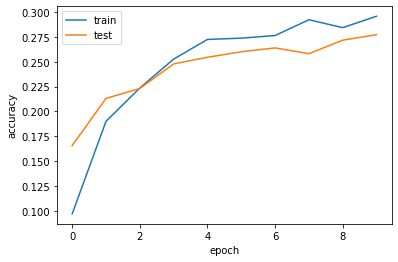

In [20]:
# TRAINING LOOP

def compute_n_correct(preds, targets):
    return torch.sum(preds.argmax(dim=-1) == targets).cpu().item()

model = W2VClassifier(w2v_id_to_vector, w2v_id_to_vector.shape[1], len(USER_MAPPING), -1)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.001)
loss_fn = CrossEntropyLoss()

train_losses = []
test_losses = []
train_accs = []
test_accs = []

n_epochs = 10
for epoch in range(n_epochs):
    running_loss = 0
    n_correct = 0
    for batch, targets in tqdm(w2v_train_dl, leave=False):
        preds = model(batch)
        loss = loss_fn(preds, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.cpu().item()
        new_n_correct = compute_n_correct(preds, targets)
        n_correct += new_n_correct
        
    train_losses.append(running_loss / len(w2v_train_ds))
    train_accs.append(n_correct / len(w2v_train_ds))
    print("="*20)
    print(f"Epoch {epoch+1}/{n_epochs} Train Loss: {running_loss / len(w2v_train_ds)}")
    print(f"Epoch {epoch+1}/{n_epochs} Train Accuracy: {n_correct / len(w2v_train_ds)}" )
    
    running_loss = 0
    n_correct = 0
    with torch.no_grad():
        for batch, targets in tqdm(w2v_test_dl, leave=False):
            preds = model(batch)
            loss = loss_fn(preds, targets)
            running_loss += loss.cpu().item()
            new_n_correct = compute_n_correct(preds, targets)
            n_correct += new_n_correct

    test_losses.append(running_loss / len(w2v_test_ds))
    test_accs.append(n_correct / len(w2v_test_ds))
    print(f"Epoch {epoch+1}/{n_epochs} Test Loss: {running_loss / len(w2v_test_ds)}")
    print(f"Epoch {epoch+1}/{n_epochs} Test Accuracy: {n_correct / len(w2v_test_ds)}" )

write_pickle(f'model-w2v.pk', model)

plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("mean loss")
plt.show()

plt.plot(train_accs, label="train")
plt.plot(test_accs, label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

<div class='q_lightpurp'><b>2.1 Performance Reflection [2 points]</b>
    
Reflect on the performance of this Word2Vec-based model. What are its shortcomings?
    
</div>

YOUR RESPONSE HERE

## Transformer Tokenization

**Note:** You do not need to implement anything in this section.  Just read it to gain an understanding for how tokenization works in the `transformers` library.

Every pretrained model comes with its own tokenizer.  Since we will be using BERT from the `transformers` library, we should also use its accompanying tokenizer.  Specifically, we are using the ``bert-base-cased`` model.  You can read more about it [here](https://huggingface.co/bert-base-cased).  Run the following cell to import the relevant tokenizer from `transformers`.  Note that the imported tokenizer will not have our special `USER_TOKEN` and `URL_TOKEN` in its vocabulary, so we explicitly add these.    

In [21]:
from transformers import AutoTokenizer

MODEL_NAME = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, additional_special_tokens=[USER_TOKEN, URL_TOKEN])

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Next, run the following cell to see how the tokenizer can be used to tokenize our text.    

In [22]:
tokenized_text = tokenizer(train_text, truncation=True)

In [23]:
print(tokenized_text)
print(train_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The object `tokenized_text` is a custom object from the `transformer` library.  It has a `__getitem__` function, so you can index into it.  For example, `tokenized_text[0]` gets the first tokenized tweet.  As an example, you can get the tokens and integer representations of the first tweet by running the cell below.

In [24]:
print(tokenized_text[0].tokens)
print(tokenized_text[0].ids)

['[CLS]', 'The', 'At', '##hl', '##eta', 'Presents', 'Gold', 'Over', 'America', 'Tour', 'kicks', 'off', 'this', 'month', '!', 'Here', '’', 's', 'a', 'preview', 'of', 'what', 'to', 'expect', 'when', 'we', 'roll', 'into', 'your', 'town', '[UNK]', '[UNK]', '[URL]', '[USER]', '[USER]', '[URL]', '[SEP]']
[101, 1109, 1335, 8495, 12405, 21680, 3487, 3278, 1738, 3124, 16721, 1228, 1142, 2370, 106, 3446, 787, 188, 170, 24409, 1104, 1184, 1106, 5363, 1165, 1195, 5155, 1154, 1240, 1411, 100, 100, 28997, 28996, 28996, 28997, 102]


<div class='q_lightpurp'>

## Dataset and DataLoader
    
</div>

<div class='q_lightpurp'><b>2.2 Implement Dataset [2 points]</b>

Taking what you learned about the `transformers` tokenizer in the previous section, implement the following custom PyTorch `Dataset` for our data, called `TweetsDataset`.  As always, you need to implement three functions: `__init__`, `__len__`, and `__getitem__`.  The `__getitem__` function should return two tensors -- a tensor of tokenized ids and a tensor with a single integer representing the user.

</div>

In [25]:
class TweetsDataset(Dataset):
    
    def __init__(self, text: List[str], labels: List[str], tokenizer: AutoTokenizer):
        self.tokenized_text = tokenizer(text, truncation=True)
        self.encoded_tokenized_text = [enc.tokens for enc in self.tokenized_text.encodings]
        self.tokenized_id = [enc.ids for enc in self.tokenized_text.encodings]
        self.labels = labels
        #raise NotImplementedError   # TODO: implement    
    def __len__(self) -> int:
        #raise NotImplementedError   # TODO: implement    
        return len(self.labels)
    def __getitem__(self, idx: int) -> Tuple[Tensor, Tensor]:
        return torch.tensor(self.tokenized_id[idx]), torch.tensor(USER_MAPPING[self.labels[idx]])
        

Now, run the following cell to create two datasets -- one for training and one for testing.

In [26]:
train_ds = TweetsDataset(train_text, train_user, tokenizer)
test_ds = TweetsDataset(test_text, test_user, tokenizer)

Check that your dataset works by running the cell below.

In [27]:
print(len(train_ds))
print(len(test_ds))
print(train_ds[0])
print(test_ds[0])
print(train_ds[-1])
print(test_ds[-1])

5400
3600
(tensor([  101,  1109,  1335,  8495, 12405, 21680,  3487,  3278,  1738,  3124,
        16721,  1228,  1142,  2370,   106,  3446,   787,   188,   170, 24409,
         1104,  1184,  1106,  5363,  1165,  1195,  5155,  1154,  1240,  1411,
          100,   100, 28997, 28996, 28996, 28997,   102]), tensor(14))
(tensor([  101,  1188,  1110,   170,  1342,  1849,  1197,   119,  2091,  1142,
         1105,  1267,  1293,  1122,  2607,  1240,  1297,   119, 28997,   102]), tensor(4))
(tensor([ 101, 2181, 2256, 1950, 1253, 2422, 1104, 1115, 1512, 1825, 8916, 1183,
        1107, 9062,  136, 2048, 1363,  117, 1143, 4534,  119,  102]), tensor(2))
(tensor([  101,  1169,   787,   189,  2059,   119,   192,  4064,   178,  5529,
         1139, 28996,   106,  1567,  1142,  1461,  1177,  7059,  1193,   119,
         3764,   190,  1155,  1177,  1277,   119, 28997,   102]), tensor(0))


<div class='q_lightpurp'><b>2.3 DataLoaders [1 point]</b>
    
Next, create two dataloaders -- `train_dl` and `test_dl`. We recommend batch size of 64. Make sure you correctly set the standard parameters that need to be provided to dataloaders (e.g. `shuffle`, `drop_last`, `collate_fn`).  Let 0 be the padding index.

</div>

In [28]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def pad_collate_classifier(batch):
    (xx, yy) = zip(*batch)
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0) #tokenizer.pad_token_id) # ASK IF WE NEED TO HARD CODE THIS
    yy_stack = torch.stack(yy, dim=0)
    return xx_pad, yy_stack

# YOUR CODE HERE
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True, drop_last=True, collate_fn=pad_collate_classifier)
test_dl = DataLoader(test_ds, batch_size=64, shuffle=True, drop_last=True, collate_fn=pad_collate_classifier)
#raise NotImplementedError   # TODO: implement

Run the following cell to get a sample batch from `train_dl`, showing that your dataloader works as expected.

In [29]:
next(iter(train_dl))
next(iter(test_dl))

(tensor([[ 101, 1448, 1104,  ...,    0,    0,    0],
         [ 101,  146, 1169,  ...,    0,    0,    0],
         [ 101, 1800, 7630,  ...,    0,    0,    0],
         ...,
         [ 101, 3236,  116,  ...,    0,    0,    0],
         [ 101, 5749, 1111,  ...,    0,    0,    0],
         [ 101, 1188, 1788,  ...,    0,    0,    0]]),
 tensor([ 3, 14, 14,  5, 14, 19,  9, 16,  6, 15, 18,  6, 17,  9,  0, 17, 19, 12,
         12,  3,  6,  2, 12,  7,  3,  1, 16,  1, 13, 15,  2, 16, 13, 19, 19, 15,
          3, 14,  7,  7,  1,  5, 19, 15,  0,  8, 15,  8, 12,  3, 19,  2,  6, 14,
          3, 13,  1,  6, 16, 17,  7,  0, 12, 18]))

<div class='header_lightpurp'>

## Baseline model: Bi-LSTM

</div>

Let's experiment with one more reasonable model before implementing our final model. In this section, we will use a bidirectional LSTM and check out its performance. For simplicity, we will borrow the BERT tokenizer, which allows us to reuse the train/test dataset and Dataloader. The only parts left to do are the LSTM-based classifier structure and the training loop, which we implement below. 

Again, our LSTM classifier will specifically be a Bidirectional LSTM (we highly recommend looking at [PyTorch's LSTM documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)). This means that we will essentially be reading the tweet in both directions. We obtain the "meaning" of each token by concatenating the hidden and cell state from both directions of the LSTM. To check your understanding, prove to yourself that this concatenated summary vector has length $4\,\times$ `hidden_size`.  We then feed this into a linear layer to get a classification. 

<div class='q_lightpurp'> <b>2.4 LSTMClassifier [7 points]</b>

In the cell below, complete the `__init__()` and `forward()` functions.
    
</div>

In [45]:
class LSTMClassifier(torch.nn.Module):
    
    def __init__(self, input_size: int, hidden_size: int, output_size: int, padding_idx: int):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.padding_idx = padding_idx
        self.output_size = output_size
        self.embeddings = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(4*hidden_size, self.output_size)
        
    def forward(self, input_seqs: Tensor) -> Tensor:
        seqs_length = [((t == self.padding_idx).nonzero(as_tuple=True)[0])[0].item() if len(((t == self.padding_idx).nonzero(as_tuple=True)[0])) != 0 else t.shape.numel() for t in input_seqs]
        embedding_sequences = self.embeddings(input_seqs)
        packed_seq_batch = torch.nn.utils.rnn.pack_padded_sequence(embedding_sequences, lengths=seqs_length, batch_first=True, enforce_sorted=False)
        output, (hn, cn) = self.lstm(packed_seq_batch)
        
        summary_vec = torch.cat((hn[0,:,:], hn[1,:,:], cn[0,:,:], cn[1,:,:]), 1)
        #summary_vec = torch.reshape(summary_vec, (summary_vec.shape[0]*summary_vec.shape[2], -1))
        #import pdb
        #pdb.set_trace()
        linear_output = self.linear(summary_vec)#torch.transpose(summary_vec,0,1))
        return linear_output
        

In [46]:
batch = next(iter(train_dl))
model = LSTMClassifier(tokenizer.vocab_size+ 10, 128, len(USER_MAPPING), 0)
print(len(batch[1]))
lin_output = model(batch[0])
print(lin_output)
print(lin_output.shape)

64
tensor([[ 0.0463, -0.0016, -0.1001,  ..., -0.1898, -0.0833, -0.0482],
        [ 0.0461, -0.0393, -0.0269,  ..., -0.1118, -0.1553,  0.0017],
        [ 0.0402, -0.1310, -0.1422,  ..., -0.1896, -0.0475,  0.0344],
        ...,
        [-0.0345, -0.0139, -0.0308,  ..., -0.1166, -0.0688, -0.0465],
        [ 0.0316, -0.0844,  0.0015,  ...,  0.0410,  0.0345, -0.0536],
        [-0.0226, -0.0599,  0.0075,  ..., -0.1101, -0.1021, -0.0125]],
       grad_fn=<AddmmBackward>)
torch.Size([64, 20])


<div class='q_lightpurp'> <b>2.5 Bi-LSTM Training [6 points]</b>

Once you are confident in your solution above (LSTMClassifier model), write a training/evaluation loop below to train/evaluate your model. A few important notes:
- In PyTorch, you can train on the GPU by simply calling `model.to('cuda')` on your model object before training.  Then, in your training loop, you need to move any tensor you want to pass to the model to the GPU first.  For example, if you have a tensor called `data`, you can execute:
```
data.to('cuda')
pred = model(data)
```
Note that passing a standard CPU tensor to a CUDA model on the GPU will result in errors.
- Again, please print your training/testing loss/accuracy every epoch.  Make a graph of each metric over time once training is completed. 
- Training for 5 epochs on the small training set comprised of 60\% of the data should get you ~50\% accuracy according to our implementation. Our training loop runs in around one minute per epoch, and our testing loop runs very fast. 
  - If your implementation is too slow, you might not be maximizing the capability of LSTM, in which case you should check out the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) of the module. 
  - Alternatively, it is possible that the hidden size of your LSTM module might be too large. For reference, our implementation uses a hidden size of $200$. 

In [47]:
test_dl

In [48]:
# TRAINING LOOP


#%%time 


def compute_n_correct(preds, targets):
    #import pdb
    #pdb.set_trace()
    return torch.sum(preds.argmax(dim=-1) == targets).cpu().item()

final_model = LSTMClassifier(tokenizer.vocab_size + 2, 200, len(USER_MAPPING), 0) # ASK how to initialize this correctly with vocab size
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
final_model.to(device)

from torch.nn import CrossEntropyLoss
from torch.optim import Adam


def binary_acc(y_pred, y_test):
    y_pred_tag = torch.sigmoid(y_pred).argmax(1)
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    
    return acc

# TODO: train the model!
loss_function = CrossEntropyLoss()
optimizer =  Adam(final_model.parameters(), lr=0.001, weight_decay=0.0001)
epochs = 12

losses = {
    'train': [], # keep track of your losses in these lists
    'test': []
}

accuracies = {
    'train': [],
    'test': []
}

for epoch in range(epochs):
    running_loss = 0.0
    n_correct = 0
    #avg_training_acc = 0
    #test_running_loss = 0.0
    #avg_testing_acc = 0

    #print("This is train_dl ", next(iter(train_dl)))
    #print("This is test_dl ", next(iter(test_dl)))
    
    for word_seq, targets in tqdm(train_dl, leave=False):
        #word_seq, targets = train_batch
        word_seq = word_seq.to(device)
        targets = targets.to(device)

        final_model.train()
        
        just_model = torch.squeeze(final_model(word_seq),0)
        loss = loss_function(just_model, targets)
        #training_acc = binary_acc(just_model, targets)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        running_loss += loss.cpu().item()
        new_n_correct = compute_n_correct(just_model, targets)
        n_correct += new_n_correct
      
    losses['train'].append(running_loss / len(train_ds))
    accuracies['train'].append(n_correct / len(train_ds))
    print("="*20)
    print(f"Epoch {epoch+1}/{epochs} Train Loss: {running_loss / len(train_ds)}")
    print(f"Epoch {epoch+1}/{epochs} Train Accuracy: {n_correct / len(train_ds)}" )
    
    running_loss = 0
    n_correct = 0

    for test_word_seq, test_targets in tqdm(test_dl, leave=False):
        #print("entering test_dl")
        with torch.no_grad():
    
            #test_word_seq, test_targets = test_batch
            test_word_seq = test_word_seq.to(device)
            test_targets = test_targets.to(device)

            final_model.eval()
            test_logit_output = torch.squeeze(final_model(test_word_seq), 0)
            test_loss = loss_function(test_logit_output, test_targets)
            #testing_acc = binary_acc(test_logit_output, test_targets)
            
            #test_running_loss += test_loss.item()
            #avg_testing_acc += testing_acc.item()

            running_loss += loss.cpu().item()
            new_n_correct = compute_n_correct(test_logit_output, test_targets)
            n_correct += new_n_correct

    losses['test'].append(running_loss / len(test_ds))
    accuracies['test'].append(n_correct / len(test_ds))
    print(f"Epoch {epoch+1}/{epochs} Test Loss: {running_loss / len(test_ds)}")
    print(f"Epoch {epoch+1}/{epochs} Test Accuracy: {n_correct / len(test_ds)}" )



    #print('Epoch %d, training loss: %.3f, training accuracy: %.3f' %
    #        (epoch + 1, running_loss/len(train_dl), avg_training_acc/len(train_dl)))
    #print('Epoch %d, testing loss: %.3f, testing accuracy: %.3f' %
    #        (epoch + 1, test_loss/len(test_dl), avg_testing_acc/len(test_dl)))
    
    #losses['train'].append(running_loss/len(train_dl))
    #losses['test'].append(test_running_loss/len(test_dl))
    #accuracies['train'].append(avg_training_acc/len(train_dl))
    #accuracies['test'].append(avg_testing_acc/len(test_dl))
    
print("Finished Training")





  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 1/12 Train Loss: 0.03929628155849598
Epoch 1/12 Train Accuracy: 0.2411111111111111


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 1/12 Test Loss: 0.03118490007188585
Epoch 1/12 Test Accuracy: 0.37222222222222223


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 2/12 Train Loss: 0.02754984509061884
Epoch 2/12 Train Accuracy: 0.46370370370370373


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 2/12 Test Loss: 0.02508971161312527
Epoch 2/12 Test Accuracy: 0.44555555555555554


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 3/12 Train Loss: 0.02026563952366511
Epoch 3/12 Train Accuracy: 0.605


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 3/12 Test Loss: 0.017970050440894232
Epoch 3/12 Test Accuracy: 0.47888888888888886


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 4/12 Train Loss: 0.014203808732606746
Epoch 4/12 Train Accuracy: 0.720925925925926


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 4/12 Test Loss: 0.012896719111336602
Epoch 4/12 Test Accuracy: 0.4913888888888889


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 5/12 Train Loss: 0.009137994553203936
Epoch 5/12 Train Accuracy: 0.8216666666666667


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 5/12 Test Loss: 0.00887820257080926
Epoch 5/12 Test Accuracy: 0.51


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 6/12 Train Loss: 0.00465728072932473
Epoch 6/12 Train Accuracy: 0.9155555555555556


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 6/12 Test Loss: 0.007670339478386773
Epoch 6/12 Test Accuracy: 0.5013888888888889


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 7/12 Train Loss: 0.002454250387295529
Epoch 7/12 Train Accuracy: 0.9603703703703703


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 7/12 Test Loss: 0.0016943705744213529
Epoch 7/12 Test Accuracy: 0.4988888888888889


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 8/12 Train Loss: 0.001148460285945071
Epoch 8/12 Train Accuracy: 0.9838888888888889


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 8/12 Test Loss: 0.0012532568309042188
Epoch 8/12 Test Accuracy: 0.5152777777777777


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 9/12 Train Loss: 0.0007022191265046044
Epoch 9/12 Train Accuracy: 0.9890740740740741


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 9/12 Test Loss: 0.001368009563949373
Epoch 9/12 Test Accuracy: 0.5088888888888888


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 10/12 Train Loss: 0.0005298699136754429
Epoch 10/12 Train Accuracy: 0.992037037037037


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 10/12 Test Loss: 0.0009316224853197733
Epoch 10/12 Test Accuracy: 0.5080555555555556


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 11/12 Train Loss: 0.0007951576088520664
Epoch 11/12 Train Accuracy: 0.9853703703703703


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 11/12 Test Loss: 0.001850584629509184
Epoch 11/12 Test Accuracy: 0.4938888888888889


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 12/12 Train Loss: 0.0017421101544190336
Epoch 12/12 Train Accuracy: 0.9672222222222222


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 12/12 Test Loss: 0.001669464111328125
Epoch 12/12 Test Accuracy: 0.5016666666666667
Finished Training


{'train': [0.03929628155849598, 0.02754984509061884, 0.02026563952366511, 0.014203808732606746, 0.009137994553203936, 0.00465728072932473, 0.002454250387295529, 0.001148460285945071, 0.0007022191265046044, 0.0005298699136754429, 0.0007951576088520664, 0.0017421101544190336], 'test': [0.03118490007188585, 0.02508971161312527, 0.017970050440894232, 0.012896719111336602, 0.00887820257080926, 0.007670339478386773, 0.0016943705744213529, 0.0012532568309042188, 0.001368009563949373, 0.0009316224853197733, 0.001850584629509184, 0.001669464111328125]}


<AxesSubplot:title={'center':'Train and Validation Loss'}>

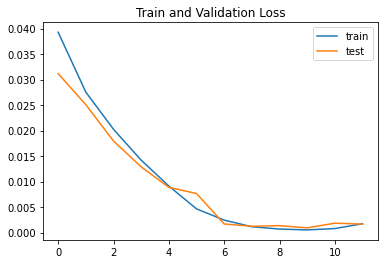

In [49]:
# optionally plot your losses
print(losses)
pd.DataFrame(losses).plot(title='Train and Validation Loss')

{'train': [0.2411111111111111, 0.46370370370370373, 0.605, 0.720925925925926, 0.8216666666666667, 0.9155555555555556, 0.9603703703703703, 0.9838888888888889, 0.9890740740740741, 0.992037037037037, 0.9853703703703703, 0.9672222222222222], 'test': [0.37222222222222223, 0.44555555555555554, 0.47888888888888886, 0.4913888888888889, 0.51, 0.5013888888888889, 0.4988888888888889, 0.5152777777777777, 0.5088888888888888, 0.5080555555555556, 0.4938888888888889, 0.5016666666666667]}


<AxesSubplot:title={'center':'Train and Validation Accuracy'}>

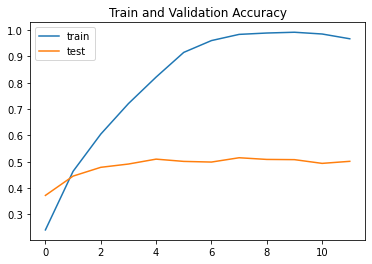

In [50]:
# optionally plot your losses
print(accuracies)
pd.DataFrame(accuracies).plot(title='Train and Validation Accuracy')

<div class='header_lightpurp'>

## BERT-based Model

</div>

Now, on to the most fun part: building the model.  Let's start by understanding BERT.  Run the following cell to import BERT from `transformers`.  We then resize its embedding layers, since we added a few tokens to the `tokenizer` previously.  Read more about BERT [here](https://huggingface.co/transformers/model_doc/bert.html).  

In [36]:
from transformers import AutoModel

bert = AutoModel.from_pretrained(MODEL_NAME)
bert.resize_token_embeddings(len(tokenizer)) 

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Embedding(28998, 768)

<div class='q_lightpurp'> <b>2.6 Reflection [4 points]</b>
    
Now, let's run a sample batch from the dataloader through the model. The result is stored in `out`.  It is a dictionary comprised of two tensors.  The dimensions of these tensors are printed for you below.  Based on what you know about Transformers, what are these outputs and why do their shapes make sense?  Which one (or both?) do we want to use for classification and why? (2-3 sentences should suffice)

</div>

In [37]:
with torch.no_grad():
  data, target = next(iter(train_dl))
  out = bert(data)

  print(out.keys())
  print(out['last_hidden_state'].shape)
  print(out['pooler_output'].shape)

  ###
  print("Data is of shape ", data.shape)
  print(target.shape)
  print("This is batch size ", train_dl.batch_size)
  print(MODEL_NAME)
  print(len(tokenizer))

odict_keys(['last_hidden_state', 'pooler_output'])
torch.Size([64, 79, 768])
torch.Size([64, 768])
Data is of shape  torch.Size([64, 79])
torch.Size([64])
This is batch size  64
bert-base-cased
28998


YOUR RESPONSE HERE

<div class='q_lightpurp'> <b>2.7 BERTClassifier [18 points]</b>

Now, let's build a `BERTClassifier` for our tweet classification task!  Note that `base_model_name` is expected to pass in the global variable `MODEL_NAME`. In your `__init__()` function, you should use `AutoModel.from_pretrained` to load in a fresh copy of BERT instead of using the one we explored above. Your `forward()` function should input a tensor of size $B \times T$ and return a tensor of size $B \times O$, where $B$ is batch size, $T$ is sequence length, and $O$ is output size, i.e. the number of classes our classifier tries to predict. For our particular use case, $O$ corresponds to the number of celebrity Twitter users. Eventually, you may find that adding a [dropout layer](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) may be helpful for regularization, although we recommend starting with `dropout = 0`. 

</div>

In [38]:
from typing import Optional

class BERTClassifier(torch.nn.Module):
    
    def __init__(self, base_model_name: str, hidden_size: int, output_size: int, dropout: Optional[float] = None):
        super().__init__()
        self.bert = AutoModel.from_pretrained(base_model_name)
        self.bert.resize_token_embeddings(len(tokenizer))
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, data: Tensor) -> Tensor:
        out = self.bert(data)
        output = self.linear(out['pooler_output'])
        return output


In [39]:
bertCLF = BERTClassifier(MODEL_NAME, 768, len(USER_MAPPING))
output = bertCLF(data)
print(output)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[-0.3345, -0.5573,  0.4131,  ...,  0.6974, -0.2805, -0.1944],
        [-0.3677, -0.5465,  0.2517,  ...,  0.5193, -0.3128, -0.1821],
        [-0.2592, -0.5470,  0.4448,  ...,  0.7756, -0.3764, -0.1959],
        ...,
        [-0.1264, -0.6415,  0.4298,  ...,  0.6033, -0.6030, -0.1172],
        [-0.3850, -0.5832,  0.1685,  ...,  0.6492, -0.3269, -0.1460],
        [-0.1270, -0.7083,  0.3763,  ...,  0.6148, -0.6009, -0.0933]],
       grad_fn=<AddmmBackward>)


<div class='q_lightpurp'> <b>2.8 Fine-Tuning [5 points]</b>

Once you are confident in your solution, write a training/evaluation loop below to train/evaluate your model.  A few important notes:
- Again, please print your training/testing loss/accuracy every epoch.  Make a graph of each metric over time once training is completed. 
- If you are using dropout, make sure you call `model.train()` before your training loop and `model.eval()` before your evluation loop.  This is important so that dropout is not applied at inference time.
- We recommend using a very low learning rate for fine-tuning (something on the order of $10^{-5}$, which is recommended by the original paper).  In fact, this is crucial when fine-tuning BERT.  If you use the standard/default $1 \times 10^{-3}$ learning rate, you will not get good results.
- Training for 5 epochs on the small training set comprised of 60\% of the data should get something with reasonable performance, i.e. >65\% accuracy on the test set. Our implementation trains in 2 mins and evaluates in 1 min per epoch. 

</div>

In [40]:
# TRAINING LOOP


#%%time 

def compute_n_correct(preds, targets):
    return torch.sum(preds.argmax(dim=-1) == targets).cpu().item()

final_model = BERTClassifier(MODEL_NAME, 768, len(USER_MAPPING))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
final_model.to(device)

from torch.nn import CrossEntropyLoss
from torch.optim import Adam

# TODO: train the model!
loss_function = CrossEntropyLoss()
optimizer =  Adam(final_model.parameters(), lr=0.00001)#, weight_decay=0.0001)
epochs = 12

losses = {
    'train': [], # keep track of your losses in these lists
    'test': []
}

accuracies = {
    'train': [],
    'test': []
}

for epoch in range(epochs):
    running_loss = 0.0
    n_correct = 0
    
    for word_seq, targets in tqdm(train_dl, leave=False):
        #word_seq, targets = train_batch
        word_seq = word_seq.to(device)
        targets = targets.to(device)

        final_model.train()
        
        just_model = torch.squeeze(final_model(word_seq),0)
        loss = loss_function(just_model, targets)
        #training_acc = binary_acc(just_model, targets)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        running_loss += loss.cpu().item()
        new_n_correct = compute_n_correct(just_model, targets)
        n_correct += new_n_correct
      
    losses['train'].append(running_loss / len(train_ds))
    accuracies['train'].append(n_correct / len(train_ds))
    print("="*20)
    print(f"Epoch {epoch+1}/{epochs} Train Loss: {running_loss / len(train_ds)}")
    print(f"Epoch {epoch+1}/{epochs} Train Accuracy: {n_correct / len(train_ds)}" )
    
    running_loss = 0
    n_correct = 0

    for test_word_seq, test_targets in tqdm(test_dl, leave=False):
        #print("entering test_dl")
        with torch.no_grad():
    
            #test_word_seq, test_targets = test_batch
            test_word_seq = test_word_seq.to(device)
            test_targets = test_targets.to(device)

            final_model.eval()
            test_logit_output = torch.squeeze(final_model(test_word_seq), 0)
            test_loss = loss_function(test_logit_output, test_targets)
            running_loss += loss.cpu().item()
            new_n_correct = compute_n_correct(test_logit_output, test_targets)
            n_correct += new_n_correct

    losses['test'].append(running_loss / len(test_ds))
    accuracies['test'].append(n_correct / len(test_ds))
    print(f"Epoch {epoch+1}/{epochs} Test Loss: {running_loss / len(test_ds)}")
    print(f"Epoch {epoch+1}/{epochs} Test Accuracy: {n_correct / len(test_ds)}" )
    
print("Finished Training")





Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 1/12 Train Loss: 0.045796595370327986
Epoch 1/12 Train Accuracy: 0.09037037037037036


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 1/12 Test Loss: 0.04399295912848578
Epoch 1/12 Test Accuracy: 0.14527777777777778


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 2/12 Train Loss: 0.04146535144911872
Epoch 2/12 Train Accuracy: 0.2187037037037037


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 2/12 Test Loss: 0.03986444155375163
Epoch 2/12 Test Accuracy: 0.2644444444444444


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 3/12 Train Loss: 0.03662697668428774
Epoch 3/12 Train Accuracy: 0.3574074074074074


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 3/12 Test Loss: 0.03592146820492215
Epoch 3/12 Test Accuracy: 0.41583333333333333


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 4/12 Train Loss: 0.031870543007497434
Epoch 4/12 Train Accuracy: 0.45666666666666667


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 4/12 Test Loss: 0.02959411303202311
Epoch 4/12 Test Accuracy: 0.48


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 5/12 Train Loss: 0.02741988433731927
Epoch 5/12 Train Accuracy: 0.5501851851851852


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 5/12 Test Loss: 0.026184830135769315
Epoch 5/12 Test Accuracy: 0.5277777777777778


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 6/12 Train Loss: 0.023480175623187313
Epoch 6/12 Train Accuracy: 0.6140740740740741


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 6/12 Test Loss: 0.02179510275522868
Epoch 6/12 Test Accuracy: 0.5694444444444444


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 7/12 Train Loss: 0.01982592496607039
Epoch 7/12 Train Accuracy: 0.6855555555555556


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 7/12 Test Loss: 0.017859472698635526
Epoch 7/12 Test Accuracy: 0.6002777777777778


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 8/12 Train Loss: 0.016698896995297186
Epoch 8/12 Train Accuracy: 0.7372222222222222


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 8/12 Test Loss: 0.014349382718404134
Epoch 8/12 Test Accuracy: 0.6047222222222223


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 9/12 Train Loss: 0.014083706791754122
Epoch 9/12 Train Accuracy: 0.7755555555555556


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 9/12 Test Loss: 0.013980279366175333
Epoch 9/12 Test Accuracy: 0.6388888888888888


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 10/12 Train Loss: 0.01142884334480321
Epoch 10/12 Train Accuracy: 0.8290740740740741


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 10/12 Test Loss: 0.009022340642081367
Epoch 10/12 Test Accuracy: 0.6452777777777777


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 11/12 Train Loss: 0.009226812952094607
Epoch 11/12 Train Accuracy: 0.872037037037037


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 11/12 Test Loss: 0.009413061274422539
Epoch 11/12 Test Accuracy: 0.6575


  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 12/12 Train Loss: 0.007509485554915887
Epoch 12/12 Train Accuracy: 0.8964814814814814


  0%|          | 0/56 [00:00<?, ?it/s]

Epoch 12/12 Test Loss: 0.008340197006861368
Epoch 12/12 Test Accuracy: 0.6588888888888889
Finished Training


<div class='q_lightpurp'> <b>2.9 Accuracy Plot [4 points]</b>

Plot the training and test accuracies (y-axis) across epochs (x-axis). 1 plot for both, please.
</div>

{'train': [0.09037037037037036, 0.2187037037037037, 0.3574074074074074, 0.45666666666666667, 0.5501851851851852, 0.6140740740740741, 0.6855555555555556, 0.7372222222222222, 0.7755555555555556, 0.8290740740740741, 0.872037037037037, 0.8964814814814814], 'test': [0.14527777777777778, 0.2644444444444444, 0.41583333333333333, 0.48, 0.5277777777777778, 0.5694444444444444, 0.6002777777777778, 0.6047222222222223, 0.6388888888888888, 0.6452777777777777, 0.6575, 0.6588888888888889]}


<AxesSubplot:title={'center':'Train and Validation Accuracy'}>

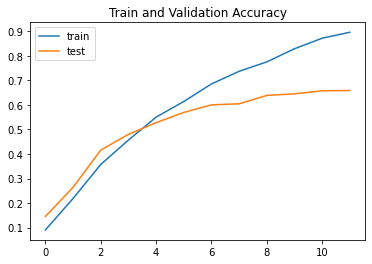

In [41]:
# optionally plot your losses
print(accuracies)
pd.DataFrame(accuracies).plot(title='Train and Validation Accuracy')

<div class='q_lightpurp'> <b>2.10 Analysis [4 points]</b>

Let's compare the performance of all three models. For each of our baseline models, list two reasons why you would expect the BERT-based model to outperform it.

</div>

YOUR RESPONSE HERE

<div class='q_lightpurp'> <b>2.11 Accuracy Matrix [10 points]</b>

Let's analyze the output of our model by looking at which tweets we classified incorrectly. Construct a 20x20 accuracy matrix `A` such that `A[target][pred]` measures the number of times our model outputs `pred` on a tweet by user `target`. Visualize the heatmap of the matrix. If your model is doing well, you should get much larger values on the diagonal than on the off-diagonal terms. 

</div>

In [42]:
test_dl.batch_size

64

In [ ]:
all_targets = []
all_preds = []
accuracy = {i:[0]*20 for i in range(20)} #[[0]*20] *20 #None

#raise NotImplementedError   # TODO: implement
for test_word_seq, test_targets in tqdm(test_dl, leave=False):
    final_model.to('cpu')
    model_output = final_model(test_word_seq)
    model_output = torch.argmax(model_output, 1)
    all_targets += test_targets.tolist()
    all_preds += model_output.tolist()
    
print("Starting forming accuracies")

    
for targ, pred in zip(all_targets, all_preds):
    accuracy[targ][pred] += 1

accuracy = np.array(list(accuracy.values()))

# Visualize the accuracy matrix. This part is implemented for you. 
accuracy_norm = accuracy / accuracy.sum(axis=1)[:,np.newaxis]
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(accuracy_norm, cmap='hot', interpolation='nearest')
plt.show()

  0%|          | 0/56 [00:00<?, ?it/s]

<div class='q_lightpurp'> <b>2.12 Understanding the Results [4 points]</b>

Which users are easier to predict? Which users are harder to predict? Answer this question by considering the diagonal of the accuracy matrix. Why do you think this might be the case? (2-3 sentences). **NOTE:** You'll likely need to write a tiny bit of code to help you discern the diagonal.

</div>

In [ ]:
# YOUR CODE HERE

YOUR RESPONSE HERE

<div class='q_lightpurp'> <b>2.13 Incorrect Predictions [5 points]</b>

Let's take a closer look at the off-diagonal entries of the accuracy matrix. Which pairs of incorrect `(target, pred)` pairs did your model produce the most frequently? Can you find an explanation for this? (2-3 sentences). **NOTE:** You'll likely need to write a tiny bit of code to help you answer this question.

</div>

In [ ]:
# Find the largest off-diagonal entries
raise NotImplementedError   # TODO: implement

YOUR RESPONSE HERE

<div class='header_green'>
    
# 3. RESEARCH [20 points]

</div>

As we build a foundation in NLP, it's also important to also see what the latest, cutting-edge work (research) looks like. It's incredibly worthwhile to learn about the types of problems people work on, their methodology and approach to the problem, the datasets they work on, the issues they raise, and the solutions they posit. The field moves incredibly fast, but the __approach__ to ML/NLP research is relatively stable -- different types of papers are accepted as the years progress, but that's a different story.

We want to help you get practice reading research papers, which mostly entails thinking critically about the work, being able to discern the main takeaways/conclusions, and to reflect on the work in a meaningful way.

<div class='q_green'><b>3.1: Read an NLP research paper [0 points]</b>
    
On Oct 14, we will have a Bias/Fairness lecture from an excellent PhD student who is a member of the Embedded EthiCS group. This lecture will concern the two papers below, and you are required to read the first paper ahead of time:
- **REQUIRED PRE-READING:** [Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings](https://proceedings.neurips.cc/paper/2016/file/a486cd07e4ac3d270571622f4f316ec5-Paper.pdf)
- OPTIONAL PRE-READING: [Lipstick on a Pig: Debiasing Methods Cover up Systematic Gender Biases in Word Embeddings But do not Remove Them](https://arxiv.org/pdf/1903.03862.pdf)

Because you are required to read the first paper, you may want to use that as the paper that you analyze below. That is perfectly fine! Alternatively, as always, you may analyze any other paper published in ACL, NAACL, EMNLP, or COLING in 2020 or 2021. You can find a list of such published papers by searching Google (Mooogle can't help you here), a la "ACL 2020 accepted papers". For this assignment, you are allowed to pick either a short paper (4-5 pages) or long paper (8-9 pages), **but you must not select a workshop paper**. List below the name of the paper, authors, venue, and year published.

While I highly encourage you to look at the aforementioned venues to find a paper that interests you, alternatively, you could select one of the following awesome papers that I've hand-selected:

- [BERT Rediscovers the Classical NLP Pipeline](https://arxiv.org/abs/1905.05950)
- [Thinking Like Transformers](https://arxiv.org/pdf/2106.06981.pdf)
- [Climbing towards NLU: On Meaning, Form, and Understanding in the Age of Data](https://aclanthology.org/2020.acl-main.463.pdf)
- [Efficient Transformers: A Survey](https://arxiv.org/abs/2009.06732)
- [When do you need billions of words of pretraining data?](https://arxiv.org/abs/2011.04946)
- [Effects of Parameter Norm Growth During Transformer Training: Inductive Bias from Gradient Descent](https://arxiv.org/abs/2010.09697)
- [Disentangling Representations of Text by Masking Transformers](https://arxiv.org/abs/2104.07155)
- [Rationales for Sequential Predictions](https://arxiv.org/abs/2109.06387)
</div>

YOUR PAPER HERE

<div class='q_green'><b>3.2: Problem? [2 point]</b> What is the problem that it is trying to address? In other words, what is it trying to solve? (2-3 sentences)
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.3: Solution? [2 point]</b> At a very high-level, what was their solution? (2-3 sentences). Here, you don't have room to go into the small details (e.g., about the model), so you'll need to summarize the most important elements that comprised the solution.
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.4: Data? [2 points]</b> What dataset(s) did they use? Are they freely available? What's the size of the data? (2-3 sentences)
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.5: Model [2 points]</b> Very related to the 'solutions' question, describe here any models that they used, and what made it effective (2-3 sentences)
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.6: Results? [2 points]</b> What are their main results? (~2 sentences)
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.7: Strengths? [2 points]</b> List 2-3 strengths of the paper
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.8: Weaknesses? [2 points]</b> Although you may be new to this problem and all of its content, try to list 2-3 weaknesses of the paper (anything that you think could strengthen the paper is sufficient).
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.9: Evaluation [2 points]</b>
    
How would you evaluate this paper in terms of:
- scientific contribution
- effectiveness to solve the problem
- how convincing it was.
    
Give each of these elements a score from 1-10 (10 is best). No word explanation necessary.
</div>

YOUR ANSWER HERE

<div class='q_green'><b>3.10: Research Ideas [4 points]</b>
    
Think of 1-2 research ideas that you have based on this paper. It doesn't have to be grand; most research is very incremental. Specifically, your research idea should have a concrete question that you're aiming to answer. List it below. 
</div>

YOUR ANSWER HERE

<div class='q_green'><b>BONUS POINTS [5 points]</b> I mention the full details in the syllabus on the course website. However, in short, these bonus points cannot bring one's grade to exceed 100. That is, if someone received a 97 on this homework, doing this bonus could allow their grade to reach 100 points. If the person had an 83 on the homework, then the most they could achieve is an 88.
    
The task: read another research paper (allowed to be a Short Paper) and answer the same questions again. Please copy and paste all of the questions below.
</div>

<div class='header_blue'>
    
# 4. SELF-REFLECTION [0 points]

</div>

<div class='q_blue'><b>4.1: Self-reflection and Feedback [0 points]</b>

Are you thriving in the course? Are there elements that are particularly confusing to you? I want everyone to be and feel fully supported. Toward this, I strongly urge you all to think critically about your own learning and efforts. If you have any new info to share with me since the last time you submitted this form, please do so now. I critically read all of your feedback, as I aim to address your concerns and better assist your learning. I want everyone to give their earnest account, so the form is completely anonymous.

</div>

[Anonymous Self-Reflection and Feedback Form](https://forms.gle/3LT6UfhtCtqp2G7X9)